### Distributia normala bivariata

In acest notebook prezentam mai multe instrumente pentru vizualizarea datelor ce au  distributie normala bivariata sau sunt observatii asupra unei mixturi Gaussiene. 

Pentru a putea rula celulele din notebook trebuie sa faceti actualizarile prezentate in notebook-ul [precedent](http://nbviewer.ipython.org/github/empet/ProbCS/blob/master/DistributiiProbCont.ipynb).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal as Nd

In `scipy.stats` se poate declara un obiect `V` ca fiind un vector aleator normal distribuit d-dimensional, 
de medie $m=(m[0,], m[1], \ldots m[d-1])^T$ si matrice de covarianta $\Sigma\in\mathbb{R}^{d\times d}$, asfel:




`V=Nd(mean=m, cov=Sigma)`

Exemplificam pentru vectori aleatori 2D:

In [2]:
m=[2, 3.5]# mediile pentru X si Y
s=[1.8, 2.3]#abaterile standard pentru X, respectiv Y
rho=-0.7# coef de corelatie dintre X si Y
covar=rho*np.sqrt(s[0]*s[1])# covarianta cov(X,Y)
Sig=np.array([[s[0]**2, covar],[covar, s[1]**2]])# Matricea de covarianta

V=Nd(mean=m, cov=Sig)# V este un vector aleator 2D, de medie m si matrice de cov, Sig

### Vizualizarea densitatii de probabilitate prin contourplot si a distributiei experimentale prin heatmap

Sa desenam graficul densitatii de probabilitate avectorului aleator $V=(X,Y)$. Fiind o suprafata,
importam  in plus instrumentele de grafica 3D:

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm# modulul matplotlib.cm contine colormap-urile 

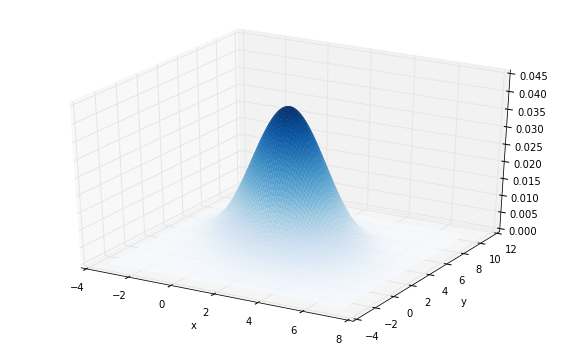

In [4]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
k=3
x=np.linspace(m[0]-k*s[0], m[0]+k*s[0], 100)
y=np.linspace(m[1]-k*s[1], m[1]+k*s[1], 100)
x,y=np.meshgrid(x,y)
pos=np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
z=V.pdf(pos)

fig1 = plt.figure(1)
ax = fig1.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.Blues,
        linewidth=0, antialiased=True)


Intensitatea culorii graficului este proportionala cu inaltimea.  Intersectand acum clopotul cu
plane paralele cu planul xOy si proiectand curbele de intersectie pe xOy obtinem contourplot-ul
densitatii de probabilitate.

<matplotlib.colorbar.Colorbar instance at 0x0000000014E1F488>

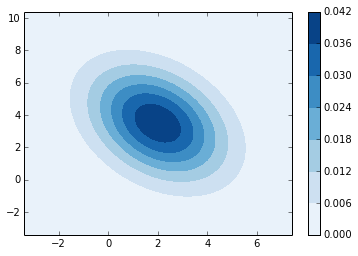

In [5]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)

fig2 = plt.figure(2)
z=V.pdf(pos)
plt.contourf(x, y, z, cmap=cm.Blues)
plt.colorbar()

Observam ca si in contourplot 
zonele corespunzatoare intersectiei cu plane $z=h$, de cota h mai ridicata, sunt mai intens colorate si respectiv sunt colorate 
cu nuante  din ce in ce mai light, pe masura ce cota $h$ descreste.

Simulam acum vectorul aleator `V` si  vom vedea ca  punctele generate vor fi dispuse intr-un disc eliptic la fel orientat
si aproximativ la fel colorat ca acest contourplot:

In [9]:
pts=V.rvs(size=5000)# generam 5000 de puncte ca observatii asupra vectorului aleator

In [10]:
print type(pts)

<type 'numpy.ndarray'>


<matplotlib.colorbar.Colorbar instance at 0x0000000014D08D08>

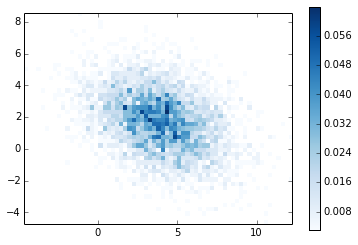

In [11]:
fig3=plt.figure(3)
H, xedges, yedges = np.histogram2d(pts[:,1], pts[:,0], bins=[50,65], normed=True)
Hmasked = np.ma.masked_where(H==0,H) #mascam pixelii a caror valoare este 0
extent = [ xedges[0], xedges[-1],  yedges[0], yedges[-1]]
heatmap=plt.imshow(Hmasked, cmap='Blues', origin='lower',interpolation='nearest', extent=extent)
plt.colorbar()

Functia `np.histogram2D` calculeaza cate puncte sunt generate in fiecare subdreptunghi rezultat din divizarea
unui dreptunghi ce contine punctele generate, prin  50 intervale de subdivizune pe orizontala si 65 pe verticala (`bins=[50, 65]`). 

Setand
 `normed=true` se calculeaza  probabilitatea ca un punct generat sa cada intr-un astfel de subdreptunghi, ca fiind nr punctelor generate in subdreptunghi supra nr total de puncte. Apoi colorarea subdreptunghiurilor se face mapand intervalul $[0,prob_{max}]$ al probabilitatilor inregistrate, pe nuantele paletei de culori
numita `Blues`.  Patratele mai intens colorate au probabilitatea experimentala de vizita mai mare, iar cele colorate cu light blue au o probabilitate mai redusa. 

Imaginea distributiei de probabilitate astfel generata se numeste `heatmap`.

Notam ca,
pentru a vizualiza un punct de  coordonate carteziene (x,y), in apelul functiei `np.histogram2d`, se includ ca argumente
punctele de coordonate pixel $(y,x)$. 

In cazul nostru am scris argumentele in aceasta ordine: `pts[:,1], pts[:,0]`. 
A se vedea in cursul de Algebra-Geometrie legatura dintre coordonatele pixel si coordonatele carteziene ale unui punct dintr-o imagine


Sa vizualizam  contourplot-ul  si heatmap-ul cu o paleta (colormap) ce nu  consta ca si `Blues`, folosit mai sus, doar din nuante ale aceleiasi culori. 
Lista colormap-urilor din `matplotlib` este afisata [aici](http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps):

<matplotlib.colorbar.Colorbar instance at 0x0000000014905888>

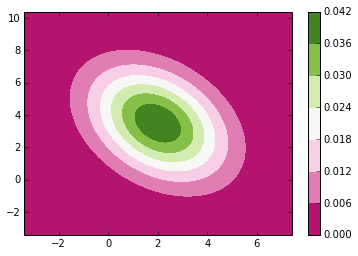

In [12]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)

fig4 = plt.figure(4)
plt.contourf(x, y, V.pdf(pos), cmap=cm.PiYG)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x0000000014E8DCC8>

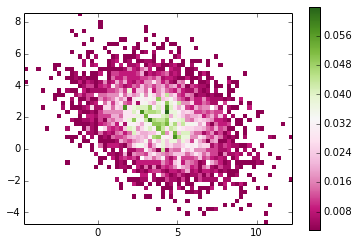

In [13]:
fig5 = plt.figure(5)
heatmap1=plt.imshow(Hmasked, cmap='PiYG', origin='lower',interpolation='nearest', extent=extent)
plt.colorbar()

### Mixturi Gaussiene 2D

Avand k distributii de probabilitate Gauss, 2D, de  densitati de probabilitate
 $f_1$, $f_2, \ldots, f_k$, atunci o combinatie convexa a lor cu probabilitatile: $p_1, p_2,\ldots, p_k$, $\sum_{j=1}^kp_k=1$:

$$f=p_1f_1+p_2f_2+\cdots+p_kf_k$$
este o densitate de probabilitate numita  mixtura Gaussiana 2D.


Sa ilustram  o mixtura Gaussiana ce este combinatia a 4 densitati de probabilitate Gaussiene 2D.

Mediile si abaterile standard ale coordonatelor vectorilor aleatori Gaussieni  $(X_i, Y_i)$, $i=0,1,2,3$, le dam in cate un array de 4 linii si 2 coloane, fiecare linie reprezentand vectorul mediilor, respectiv al abaterilor standard ale  distributiilor Gauss 2D, corespunzatoare.

Coeficientii de corelatie $\rho(X_i, Y_i)$, $i=0,1,2,3$, ii dam intr-un vector de 4 coordonate:

In [14]:
pr=[0.2, 0.4, 0.15, 0.25]# lista probabilitatilor din definitia mixturii
med=np.array([[0.5,0.5], [0.7,4.3], [2.9, 3.4],[2.5,2]])# mediile
sig=np.array([[0.2, 0.25],   [0.5,0.8],  [0.2375, 0.4125 ],[0.35,0.53]]) # abaterile standard
rho=np.array([0.0, -0.67,-0.76,0.5])# coeficientii de corelatie

In [15]:
def Covariance(m, s, r):# functie ce genereaza matricea de cov a unui vector (X,Y)~N(m,Sigma)
  covar= r*s[0]*s[1]
  return np.array([[s[0]**2, covar], [covar, s[1]**2]])  
    

Intr-un array 3D stocam cele 4 matrici de covarianta:

In [16]:
Sigma=np.zeros((2,2,4), float)# 4 matrici 2D;
                              #Sigma[:,:, i] este matricea de covarianta a vectorului (X_i, Y_i)

for i in range(4):
    Sigma[:,:,i]=Covariance(med[i, :], sig[i,:], rho[i])
    

Definim functia care din vectorul probabilitatilor `pr`, matricea mediilor si array-ul 3D al matricilor de covarianta
evalueaza densitatea de probabilitate a mixturii in punctele unei grile din plan:

In [17]:
def mixtureDensity(x,y, pr, med, Sigma):# x este array-ul absciselor nodurilor grilei,
                                        #iar y al ordonatelor
   pos=np.empty(x.shape + (2,))# daca x.shape este (m,n) atunci pos.shape este (m,n,2)
   pos[:, :, 0] = x; pos[:, :, 1] = y 
   z=np.zeros(x.shape)
   for i in range(4) :
        z=z+pr[i]*Nd.pdf(pos, mean=med[i,:], cov=Sigma[:,:, i])
   return z     

S-a definit array-ul 3D `pos`, pentru a corespunde modalitatii de implementare a densitatii
unei distributii [normale multivariate](http://docs.scipy.org/doc/scipy-dev/reference/generated/scipy.stats.multivariate_normal.html). 

Pentru a alege un dreptunghi  de definitie pentru mixtura, exploatam inegalitatea lui Cebasev conform careia:
    $P(m-k\sigma<X<m+k\sigma)>1/k^2$. Si anume identificam variabila $X_{jx}$ ce are media minima, respectiv variabila $X_{Jx}$ de medie maxima, intre toate variabilele $X_0, X_1, X_2, X_3$
    si procedam analog si pentru variabilele $Y_0, Y_1, Y_2, Y_3$:
  

In [18]:
mmx=np.min(med[:,0] )
mMx=np.max(med[:,0])#cea mai mica si cea mai mare medie pt X_0, X_1, X_2, X_3
mmy=np.min(med[:,1] )
mMy=np.max(med[:,1])
jx=np.argmin(med[:,0])
Jx=np.argmin(-1.0*med[:,0])
jy=np.argmin(med[:,1]) 
Jy=np.argmin(-1.0*med[:,1])

x initial (100L,)
x din grila (100L, 100L)


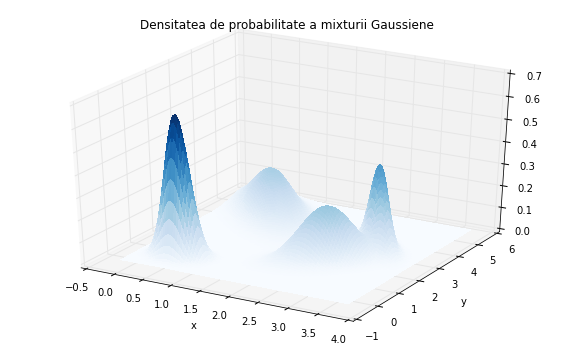

In [19]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
k=3.5
x=np.linspace(mmx-k*sig[jx][0], mMx+k*sig[Jx][0], 100)
print 'x initial', x.shape
y=np.linspace(mmy-k*sig[jy][1], mMx+k*sig[Jy][1], 100)
x,y=np.meshgrid(x,y)# din punctele de divizune pe Ox si Oy se constituie grila 2D
print 'x din grila', x.shape#x este acumarray 2D. Elementele sale sunt abscisele nodurilor grilei
z=mixtureDensity(x,y,pr,  med, Sigma)
fig6=plt.figure(6)
ax = fig6.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Densitatea de probabilitate a mixturii Gaussiene')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.Blues,
        linewidth=0, antialiased=False)

Folosind un alt colormap graficul densitatii mixturii arata astfel:

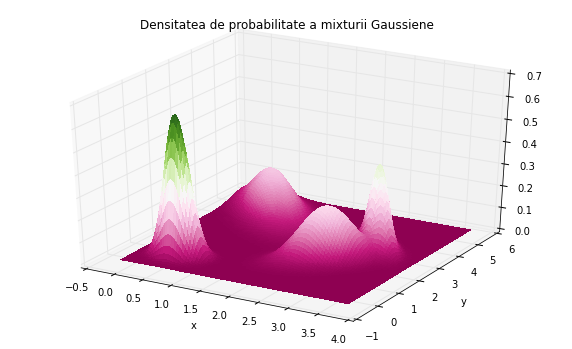

In [20]:
fig7=plt.figure(7)
ax = fig7.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Densitatea de probabilitate a mixturii Gaussiene')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.PiYG,
        linewidth=0, antialiased=False)


Sa generam contourplot-ul mixturii:

<matplotlib.colorbar.Colorbar instance at 0x0000000018FA2D08>

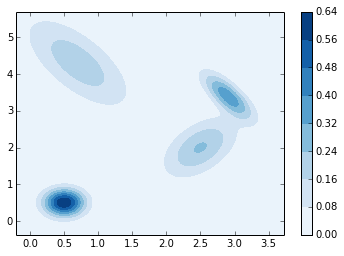

In [21]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)
fig8=plt.figure(8)
plt.contourf(x, y, z, cmap=cm.Blues)
plt.colorbar()

Sa simulam acum aceasta mixtura:

In [22]:
def  simDiscrete(pr):
    k=0
    F=pr[0]
    u=np.random.random()
    while(u>F):
        k+=1
        F=F+pr[k]
    return k

In [23]:
def  GaussianMixture2D(N, pr, med,Sigma):
   dis=[simDiscrete(pr) for i in xrange(N)]#genereaza N observatii asupra distr discrete

   pts=np.empty((N,2), dtype=float)# pts  contine punctele  generate simuland  mixtura
   n=len(pr)
   for k in range(n):
        
       I=[j for j in range(N) if dis[j] == k]# lista indicilor elementelor listei dis, egale 
                                             #cu k (k=0, 1,  ..., n-1) 
       s=len(I)
       ptsk=Nd.rvs(size=s, mean=med[k], cov=Sigma[:,:,k])#generam atatea valori din ia distr. f_k
                                                     #cat este lungimea lui I
       pts[I,:]=ptsk # in pozitiile I copiem valorile generate
   return pts

In [24]:
N=10000
pts=GaussianMixture2D(N,pr, med, Sigma)

<matplotlib.colorbar.Colorbar instance at 0x0000000018FA3B88>

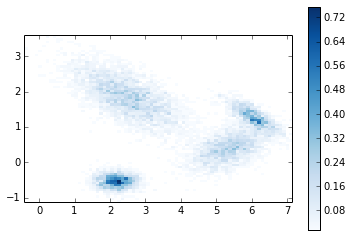

In [25]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)
fig9=plt.figure(9)
H, xedges, yedges = np.histogram2d(pts[:,1], pts[:,0], bins=[75,75], normed=True)
Hmasked = np.ma.masked_where(H==0,H) 
extent = [ xedges[0], xedges[-1],  yedges[0], yedges[-1]]
heatmap=plt.imshow(Hmasked, cmap='Blues', origin='lower',interpolation='nearest', extent=extent)
plt.colorbar()


### Contourplots si heatmaps folosind `seaborn`

In [28]:
import seaborn as sb
import scipy.stats as st

`seaborn` ofera posibiliatea de a identifica dintr-un sir de observatii asupra a doua variabile aleatoare, $X$, $Y$, normal normal distribuite, $X\sim N(m_0,\sigma_0)$, $Y\sim N(m_1, \sigma_1)$,
coeficientul lor de corelatie. Functia  `sb.jointplot` vizualizeaza norul de puncte $(x_i, y_i)$ ce sunt obsevatii asupra vectorului $(X,Y)$ si traseaza histogramele distributiilor marginale, ale lui $X$, respectiv $Y$.


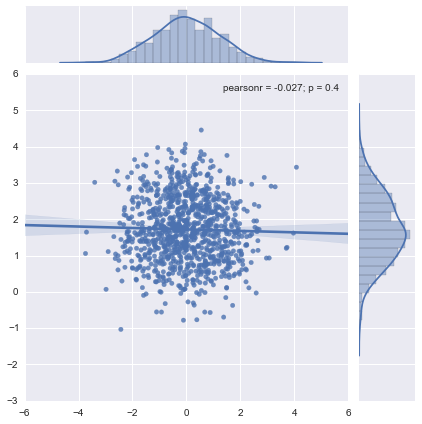

In [29]:
mX=0; sigX=1.2
mY=1.7; sigY=0.93
xvals=st.norm.rvs(size=1000, loc=mX, scale=sigX)
yvals=st.norm.rvs(size=1000, loc=mY, scale=sigY)
sb.jointplot(xvals, yvals,size=6, kind="reg");# alte optiuni pt kind: `kde`

Coeficientul Pearson, r, este un estimator al coeficientului de corelatie $\rho(X,Y)$. Fiind foarte apropiat de 0, concluzionam ca cele doua variabile aleatoare sunt
necorelate si fiind normal distribuite sunt independente (in general 2 variabile necorelate nu sunt independente, dar in cazul normal ele sunt!!!!)

Sa verificam cat de bine estimeaza `seaborn.jointplot` coeficientul de corelatie. In acest scop generam observatii
asupra unui vector aleator normal distribuit $(X,Y)$ cu $\rho(X,Y)=0.67$ si apoi comparam coeficientul Pearson
calculat cu acest $\rho$:

In [30]:
m=[1, -2]# mediile pentru X si Y
rho=0.67
s=[1.2, 0.9]#abaterile standard pentru X, respectiv Y
covar=rho*np.sqrt(s[0]*s[1])
Sig=[[s[0]**2, covar],[covar, s[1]**2]]

V=Nd(mean=m, cov=Sig)# 

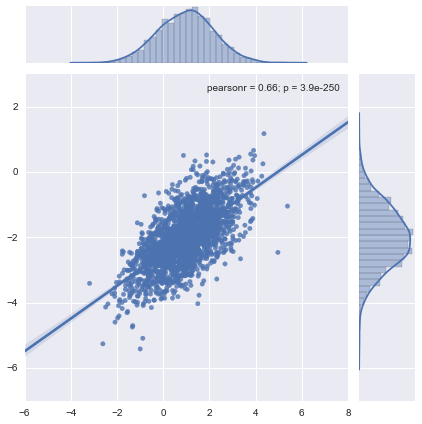

In [32]:
pts=V.rvs(size=2000)
sb.jointplot(pts[:,0], pts[:,1], size=6, kind="reg");

Observam ca estimatorul lui $\rho$ este suficient de bun. Axa mare a norului eliptic este
de panta pozitiva, pentru ca $\rho(X,Y)>0$.

Apeland acum functia `sb.joinplot`, cu  cuvantul cheie `kind` setat pe `kde`, este afisata o aproximatie a contourplot-ului
densitatii de probabilitate a vectorului aleator normal distribuit, $V=(X,Y)$, iar sus si lateral dreapta, aproximatii ale densitatii lui $X$, respectiv $Y$:

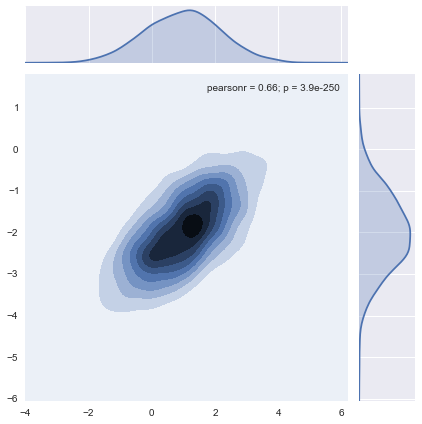

In [33]:
sb.jointplot(pts[:,0], pts[:,1], size=6, kind="kde");

`kde`  inseamna kernel density estimation. Exista cativa algoritmi folositi in statistica si machine learning 
care estimeaza densitatea de probabilitate a unei variabile aleatoare (vector aleator)  din observatii asupra acestora.


### Exemple de aplicatii ale heatmap-urilor

Nu doar distributiile normale bivariate se vizualizeaza prin heatmap-uri, ci orice alta distributie 2D.
De exemplu dupa campionatul mondial din 2010 pe site-ul FIFA s-au afisat heatmap-urile color ale pozitiei jucatorilor in teren in timpul fiecarui meci.
Ilustram mai jos heatmap-ul asociat jucatorului Piqu&eacute;:

In [34]:
from IPython.display import Image

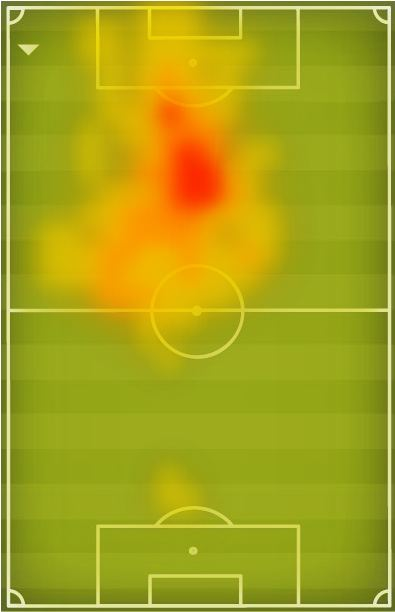

In [35]:
Image(filename='Imags/heatmap_pique.jpg')#imaginea a fost postata pana de curand
#aici: 
#http://www.fifa.com/worldcup/archive/southafrica2010/statistics/players/player=216973/
#heatmap.html

Evident, distributia de probabilitate a pozitiei lui Piqu&eacute; in teren este o mixtura de mai multe distributii.
Zona mai intens colorata in rosu este cea in care jucatorul a revenit mai des.

In [acest document](http://www.fifa.com/mm/document/tournament/competition/01/26/71/60/59_0703_arg-ger_playersheatmap.pdf) se pot vedea heatmap-urile tuturor jucatorilor din meciul Argentina-Germania.

Pentru optimizarea paginilor WEB se genereaza [heatmap-ul click-urilor vizitatorilor](http://www.clicktale.com/products/heatmap-suite)
    

In recunoasterea formelor se pune problema inversa: dintr-un nor de puncte, ce se interpreteaza a fi valori de observatie asupra unei mixturi 
(Gaussiene) de K distributii,  se estimeaza conform algoritmului EM (Expectation Maximization) 
probabilitatile din definitia mixturii,
punctele ce sunt centrii norilor (adica vectorii medii pentru fiecare distributie bivariata componenta) si elementele matricilor de covarianta. Prezentarea algoritmului [aici](http://www.cs.duke.edu/courses/spring04/cps196.1/handouts/EM/tomasiEM.pdf).

In [1]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()